In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cdata_mex_pairs=pd.read_csv('../output_data/complexity_data_mex_pairs_all.csv')

#RCA weighted metrics
cdata_mex_pairs['GPDperCAP_rca1']=cdata_mex_pairs['GPDperCAP']*cdata_mex_pairs['rca1']
cdata_mex_pairs['discovery_factor_rca1']=cdata_mex_pairs['discovery_factor']*cdata_mex_pairs['rca1']
cdata_mex_pairs['degree_centrality_rca1']=cdata_mex_pairs['degree_centrality']*cdata_mex_pairs['rca1']
cdata_mex_pairs['eigenvecor_centrality_rca1']=cdata_mex_pairs['eigenvecor_centrality']*cdata_mex_pairs['rca1']
cdata_mex_pairs['closeness_centrality_rca1']=cdata_mex_pairs['closeness_centrality']*cdata_mex_pairs['rca1']


cdata_mex_pairs_under_trans=cdata_mex_pairs.loc[cdata_mex_pairs['M_num'].isin([0,1])]
cdata_mex_pairs_under_trans

,Unnamed: 0.1,Unnamed: 0,year_pair,location_code,Product,export,eci,pci,density,coi,...,ied,discovery_factor,degree_centrality,eigenvecor_centrality,closeness_centrality,GPDperCAP_rca1,discovery_factor_rca1,degree_centrality_rca1,eigenvecor_centrality_rca1,closeness_centrality_rca1
0,0,0,2004_2009,Aguascalientes,112511,1004.0,0.256317,-1.921854,0.324795,0.742236,...,0.0,1.399113,0.609355,0.027170,0.719091,0.0,0.0,0.0,0.0,0.0
1,1,1,2004_2009,Aguascalientes,112512,1004.0,0.256317,-1.381170,0.375059,0.742236,...,0.0,2.377619,0.849558,0.037179,0.869231,0.0,0.0,0.0,0.0,0.0
2,2,2,2004_2009,Aguascalientes,114111,1004.0,0.256317,-2.459290,0.341204,0.742236,...,0.0,1.607370,0.700379,0.030799,0.769455,0.0,0.0,0.0,0.0,0.0
3,3,3,2004_2009,Aguascalientes,114112,1004.0,0.256317,-1.305625,0.265136,0.742236,...,0.0,1.113494,0.523388,0.023113,0.677226,0.0,0.0,0.0,0.0,0.0
4,4,4,2004_2009,Aguascalientes,114113,1004.0,0.256317,1.981890,0.240150,0.742236,...,0.0,0.000000,0.395702,0.017599,0.623325,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101429,101429,101429,2004_2019,Zacatecas,722320,1004.0,-0.963458,0.219078,0.289040,-0.546682,...,0.0,5.987767,0.941846,0.040238,0.945042,0.0,0.0,0.0,0.0,0.0
101449,101449,101449,2004_2019,Zacatecas,811313,1004.0,-0.963458,1.237497,0.233178,-0.546682,...,0.0,2.729306,0.938053,0.040004,0.941667,0.0,0.0,0.0,0.0,0.0
101450,101450,101450,2004_2019,Zacatecas,811314,1004.0,-0.963458,0.796731,0.230364,-0.546682,...,0.0,6.723330,0.949431,0.040584,0.951865,0.0,0.0,0.0,0.0,0.0
101469,101469,101469,2004_2019,Zacatecas,813130,1004.0,-0.963458,-1.978651,0.367556,-0.546682,...,0.0,0.000000,0.843236,0.036402,0.864481,0.0,0.0,0.0,0.0,0.0


In [3]:
cdata_mex_pairs['discovery_factor'].isna().any()

False

In [19]:
low_range_array=[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]

for low_range in low_range_array:

    cdata_mex_pairs['M_num_relaxed_'+str(low_range).replace('.','_')] = cdata_mex_pairs.apply(lambda row: 1 if row['rca1'] < low_range and row['rca2'] > 1 else (0 if row['rca1'] < low_range and row['rca2'] < low_range else None), axis=1)

low_range=0.5   

cdata_mex_pairs[['M_num_relaxed_'+str(low_range).replace('.','_'),'rca1','rca2']].loc[cdata_mex_pairs['M_num_relaxed_'+str(low_range).replace('.','_')]==0]

,M_num_relaxed_0_5,rca1,rca2
28,1.0,0.0,2.130704
41,1.0,0.0,2.927960
42,1.0,0.0,1.710053
48,1.0,0.0,93.532509
61,1.0,0.0,1.097990
...,...,...,...
101392,1.0,0.0,1.626426
101396,1.0,0.0,1.875283
101402,1.0,0.0,2.565201
101417,1.0,0.0,1.520953


In [28]:
cdata_mex_pairs_under_trans[['Product','M_num','rca1','rca2','density']].loc[cdata_mex_pairs_under_trans['M_num']==0]

,Product,M_num,rca1,rca2,density
0,112511,0,0.0,0.000000,0.324795
1,112512,0,0.0,0.000000,0.375059
2,114111,0,0.0,0.000000,0.341204
3,114112,0,0.0,0.000000,0.265136
4,114113,0,0.0,0.000000,0.240150
...,...,...,...,...,...
101428,722310,0,0.0,0.391545,0.163474
101449,811313,0,0.0,0.141366,0.233178
101450,811314,0,0.0,0.874347,0.230364
101469,813130,0,0.0,0.994844,0.367556


In [27]:
cdata_mex_pairs[['Product','M_num_relaxed_'+str(low_range).replace('.','_'),'rca1','rca2']].loc[cdata_mex_pairs['M_num_relaxed_'+str(low_range).replace('.','_')]==0]

,Product,M_num_relaxed_0_5,rca1,rca2
0,112511,0.0,0.0,0.000000
1,112512,0.0,0.0,0.000000
2,114111,0.0,0.0,0.000000
3,114112,0.0,0.0,0.000000
4,114113,0.0,0.0,0.000000
...,...,...,...,...
101425,721210,0.0,0.0,0.000000
101427,721312,0.0,0.0,0.204038
101428,722310,0.0,0.0,0.391545
101449,811313,0.0,0.0,0.141366


Optimization terminated successfully.
         Current function value: 0.279435
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.345255
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.197845
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.193209
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.220453
         Iterations 16
Optimization terminated successfully.
         Current function value: 0.282428
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.239554
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.285163
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.254140
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.24967

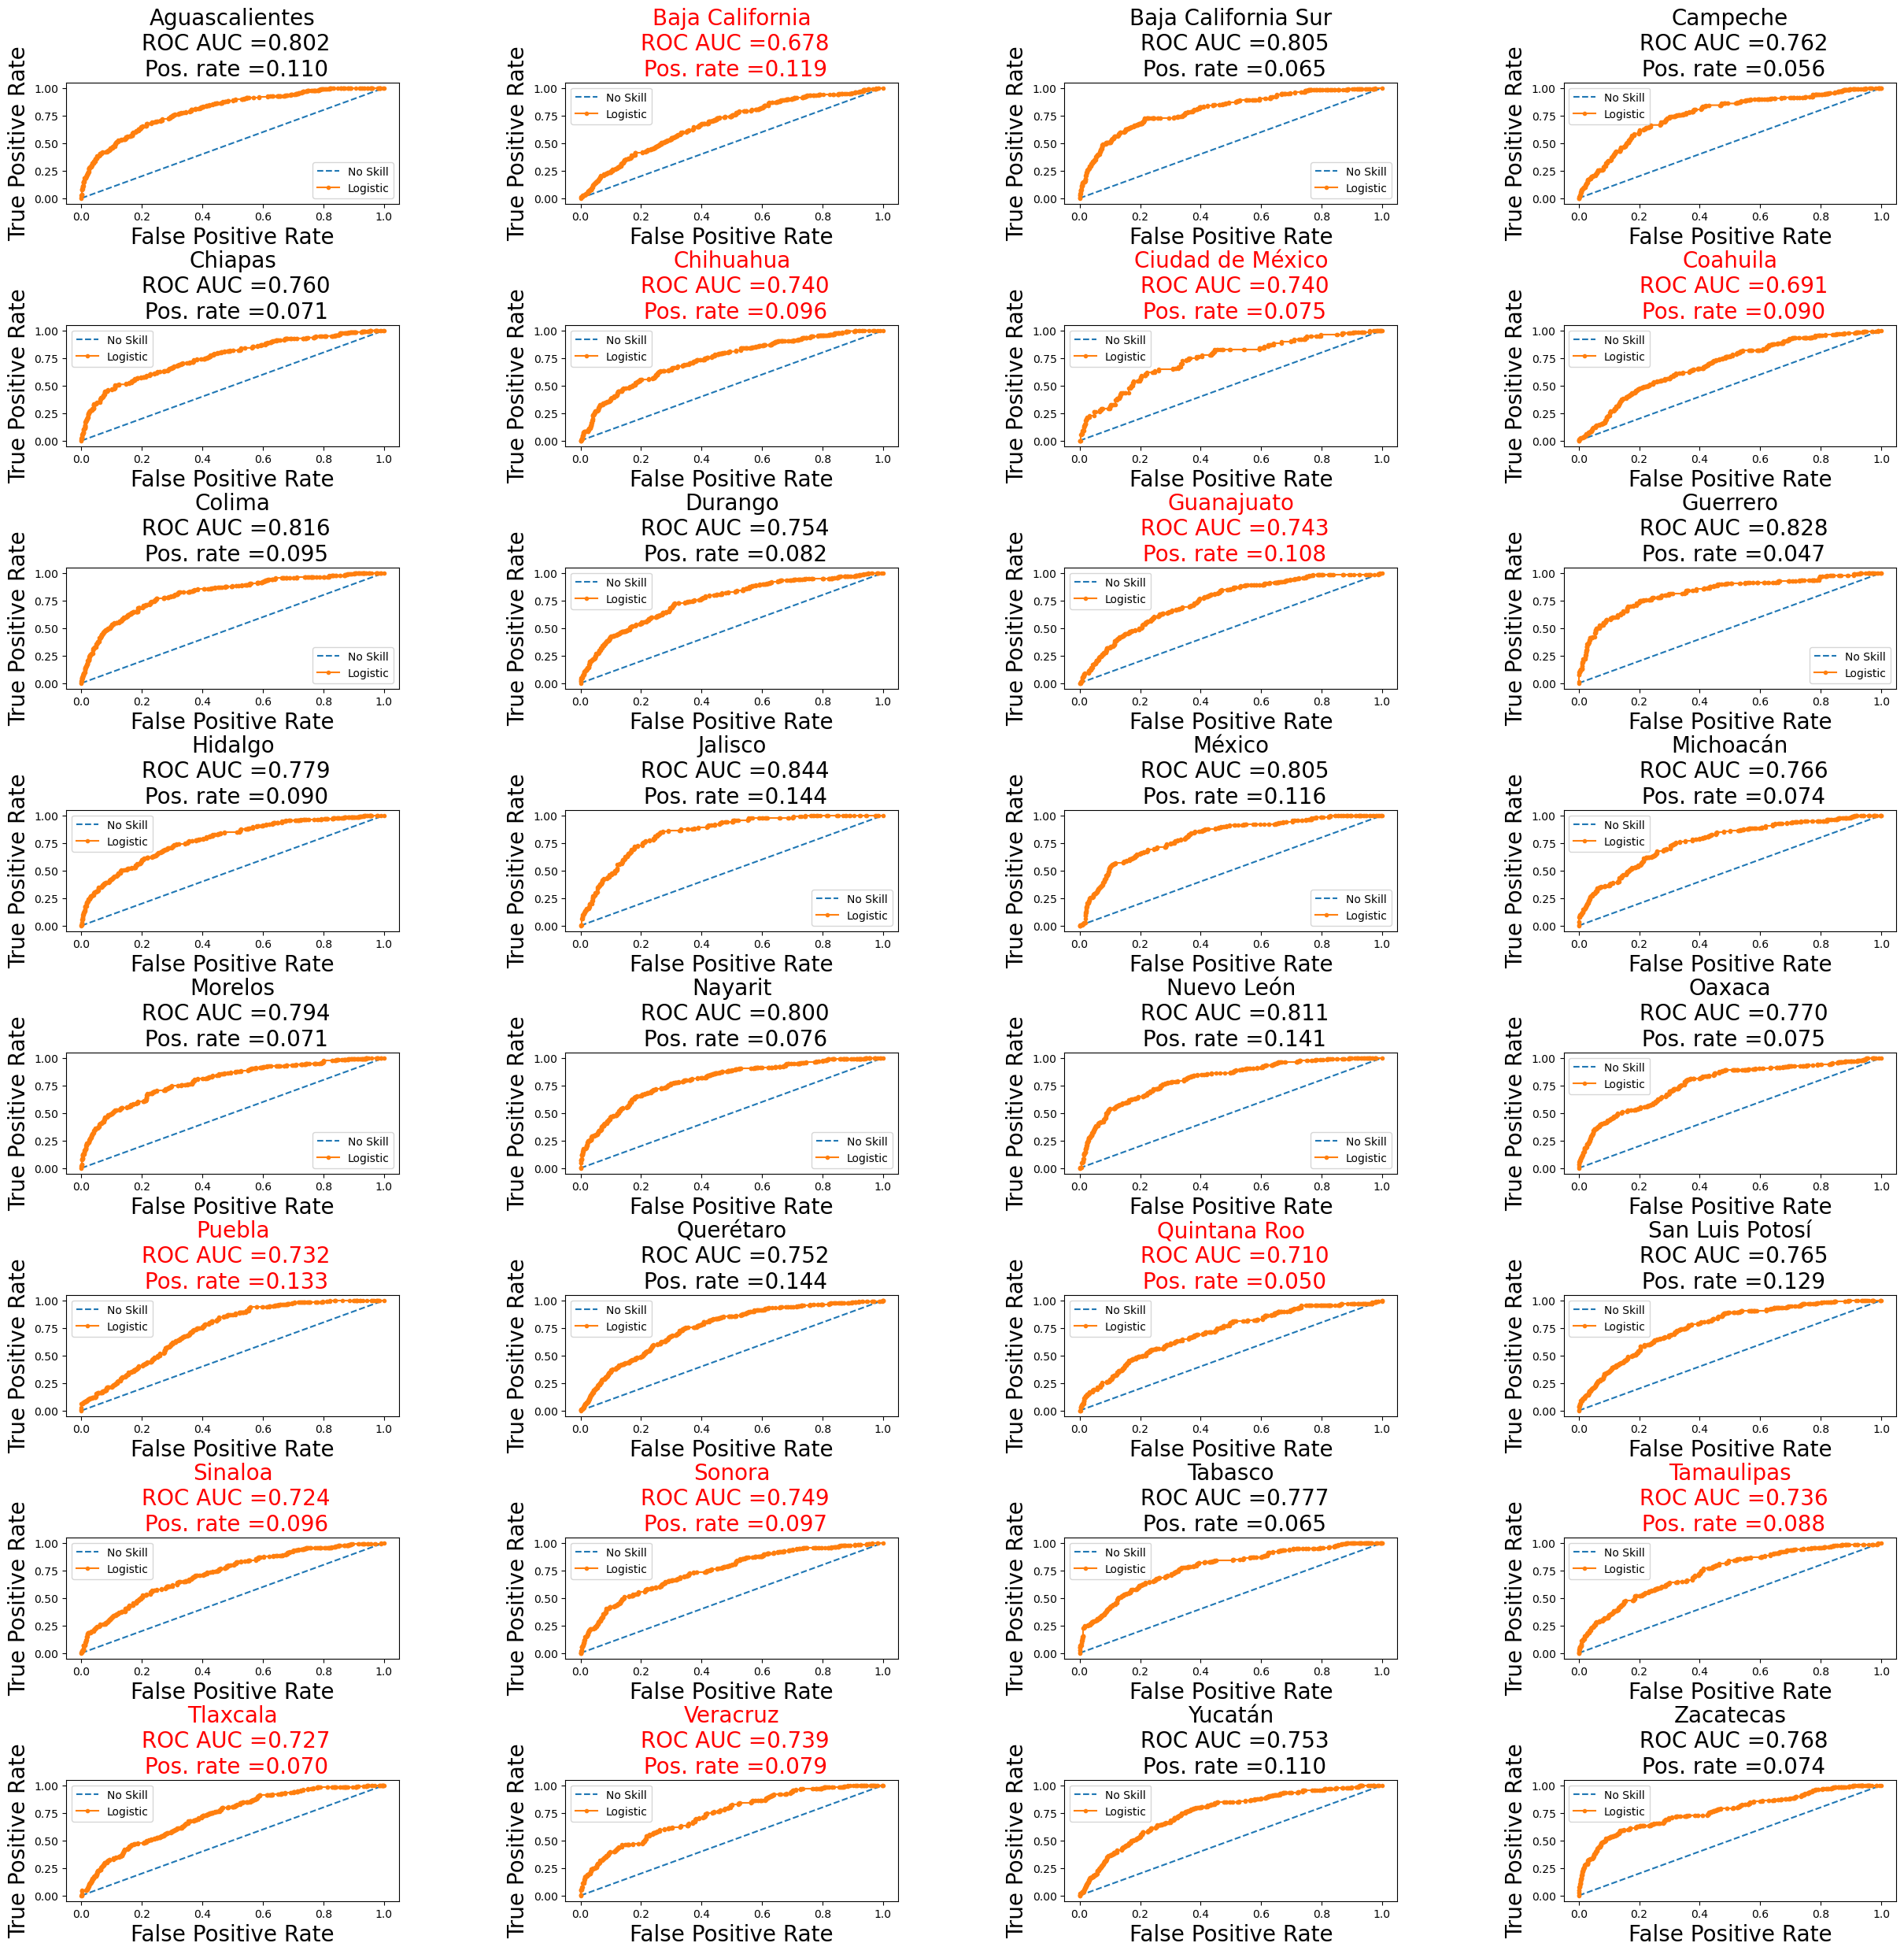

,Estado,Years,eci,eci_std_err,eci_p_value,pci,pci_std_err,pci_p_value,density,density_std_err,...,closeness_centrality_p_value,eigenvecor_centrality,eigenvecor_centrality_std_err,eigenvecor_centrality_p_value,eigenvecor_centrality_rca1,eigenvecor_centrality_rca1_std_err,eigenvecor_centrality_rca1_p_value,Intercept,Intercept_std_err,Intercept_p_value
0,Aguascalientes,All,0.008849,0.835126,0.991546,0.153420,0.082550,6.309758e-02,4.363213,3.318569,...,0.434819,-4.146508,78.220078,0.957723,234.100321,224.076155,0.296145,-8.236346,1.852354,8.731302e-06
1,Baja California,All,-1.212017,1.821591,0.505819,0.111581,0.036326,2.128988e-03,6.845392,2.125790,...,0.905367,30.686228,62.345216,0.622579,-405.439928,132.501719,0.002214,-3.164682,2.629808,2.288259e-01
2,Baja California Sur,All,-4.433906,1.949895,0.022971,0.314622,0.099720,1.604698e-03,20.943246,3.532408,...,0.236024,-37.803150,88.469026,0.669158,-240.987606,394.092765,0.540869,-14.331867,2.218490,1.045706e-10
3,Campeche,All,-0.178365,0.716785,0.803484,0.056859,0.091181,5.329018e-01,18.187536,3.797886,...,0.201114,164.307324,95.003521,0.083722,-462.269930,336.029178,0.168920,-4.478061,2.084680,3.170737e-02
4,Chiapas,All,-1.258208,1.331230,0.344584,-0.089726,0.132157,4.971808e-01,5.524918,3.208738,...,0.428033,99.584793,82.369642,0.226663,-43.220152,255.207473,0.865519,-5.199545,2.331674,2.574992e-02
5,Chihuahua,All,0.823561,0.271010,0.002375,0.053850,0.040058,1.788508e-01,21.299235,2.508849,...,0.353037,-11.370919,61.855970,0.854148,-262.075996,157.588540,0.096304,-10.647151,1.773895,1.947435e-09
6,Ciudad de México,All,0.906644,0.628192,0.148948,0.013000,0.062447,8.350875e-01,11.124468,3.357093,...,0.009031,-266.545875,92.742253,0.004052,-430.244860,141.998695,0.002446,-15.967457,4.432681,3.155213e-04
7,Coahuila,All,1.026827,0.536485,0.055621,-0.023578,0.037739,5.321237e-01,10.383982,2.146851,...,0.302079,-49.425120,66.161263,0.455039,-158.867009,177.731470,0.371397,-8.188202,1.953930,2.781770e-05
8,Colima,All,-2.802305,1.476024,0.057624,-0.120566,0.093669,1.980402e-01,3.990620,2.407975,...,0.004363,-146.289420,66.947384,0.028879,-303.374568,370.056367,0.412326,-12.351318,2.034576,1.273472e-09
9,Durango,All,-2.821181,1.482394,0.057024,0.166355,0.078881,3.495038e-02,12.126570,2.739224,...,0.969761,13.861156,71.430333,0.846136,18.188277,275.504162,0.947363,-7.515872,1.823282,3.753275e-05


In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Estados=cdata_mex_pairs['location_code'].unique()

years_pairs=cdata_mex_pairs['year_pair'].unique()

years=['All']


#features=['Density','Discovery_Factor','RCA','GPDperCAP']

features=['eci','pci','density','rca1',
          'GPDperCAP',
          'closeness_centrality',
          'eigenvecor_centrality',
          'degree_centrality_rca1'
          
          ]
features=['eci','pci','density','rca1','discovery_factor',
          'GPDperCAP_rca1',
          'closeness_centrality',
          'eigenvecor_centrality','eigenvecor_centrality_rca1']

#features=['eci','pci','density','rca1','GPDperCAP','closeness_centrality']


#features=['Nodes_Degree_Centrality','Nodes_Eigenvector_Centrality','Nodes_Closeness_Centrality','Density','Discovery_Factor','RCA','GPDperCAP']


est_yeas=[]
for ye in years:
    for estado in Estados:
        est_yeas.append([estado,ye])
        
regression_df=pd.DataFrame(est_yeas,columns=(['Estado','Years']))

for param in features:
    regression_df[param]=0
    regression_df[param+'_std_err']=0
    regression_df[param+'_p_value']=0

# Initiate figure
fig, axs = plt.subplots(8,4, figsize=(30, 30), facecolor='w', edgecolor='k')
# fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=0.5)

axs = axs.ravel()
target='M_num'
df=cdata_mex_pairs.copy().loc[cdata_mex_pairs[target].isin([0,1])]
score=0
for i,Estado in enumerate(Estados):
    
    data_0=df.loc[(df['location_code']==Estado)][['location_code',target]+features]
    
    str_fit = target+' ~ '+features[0]
    
    for feat in features[1:]:
        str_fit=str_fit+'+'+feat
        
    x_logistic = data_0.loc[:, features].values
    
    y_logistic = data_0[target].values
    
    positive_rate=sum(y_logistic)/len(y_logistic)

    results=smf.logit(str_fit,data=data_0).fit()
    
    val_stderr=[]
    for param in results.params.keys():
        regression_df.loc[regression_df['Estado']==Estado,param]=results.params[param]
        regression_df.loc[regression_df['Estado']==Estado,param+'_std_err']=results.bse[param]
        regression_df.loc[regression_df['Estado']==Estado,param+'_p_value']=results.pvalues[param]
        
    #ROC
    
    # Genrate a Diagonal(Random Guess)
    ns_probs = [0 for _ in range(len(y_logistic))]
    # predict probabilities
    lr_probs = results.predict(data_0[features])
    # keep probabilities for the positive outcome only
    #lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_logistic, ns_probs)
    lr_auc = roc_auc_score(y_logistic, lr_probs)
    # summarize scores
   # print(Estado)
   # print('ROC AUC for Logistic Model =%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_logistic, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_logistic, lr_probs)
    # plot the roc curve for the model
    axs[i].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    axs[i].plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    axs[i].set_xlabel('False Positive Rate',size=20)
    axs[i].set_ylabel('True Positive Rate',size=20)
    # axis Title
    if lr_auc>0.75:
        tit_color='k'
        score+=1
    if lr_auc<0.75:
        tit_color='r'
        
    axs[i].set_title(Estado+'\n ROC AUC =%.3f' % (lr_auc)+'\n Pos. rate =%.3f' % (positive_rate),size=20,c=tit_color)
    # show the legend
    axs[i].legend()
print('Score=',score/32)
print(target)
print(features)
        
plt.show()   

regression_df

# Relaxed transition

Optimization terminated successfully.
         Current function value: 0.284076
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.372918
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.192913
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.200744
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.226689
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.301966
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.256445
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.299402
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.257833
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.25391

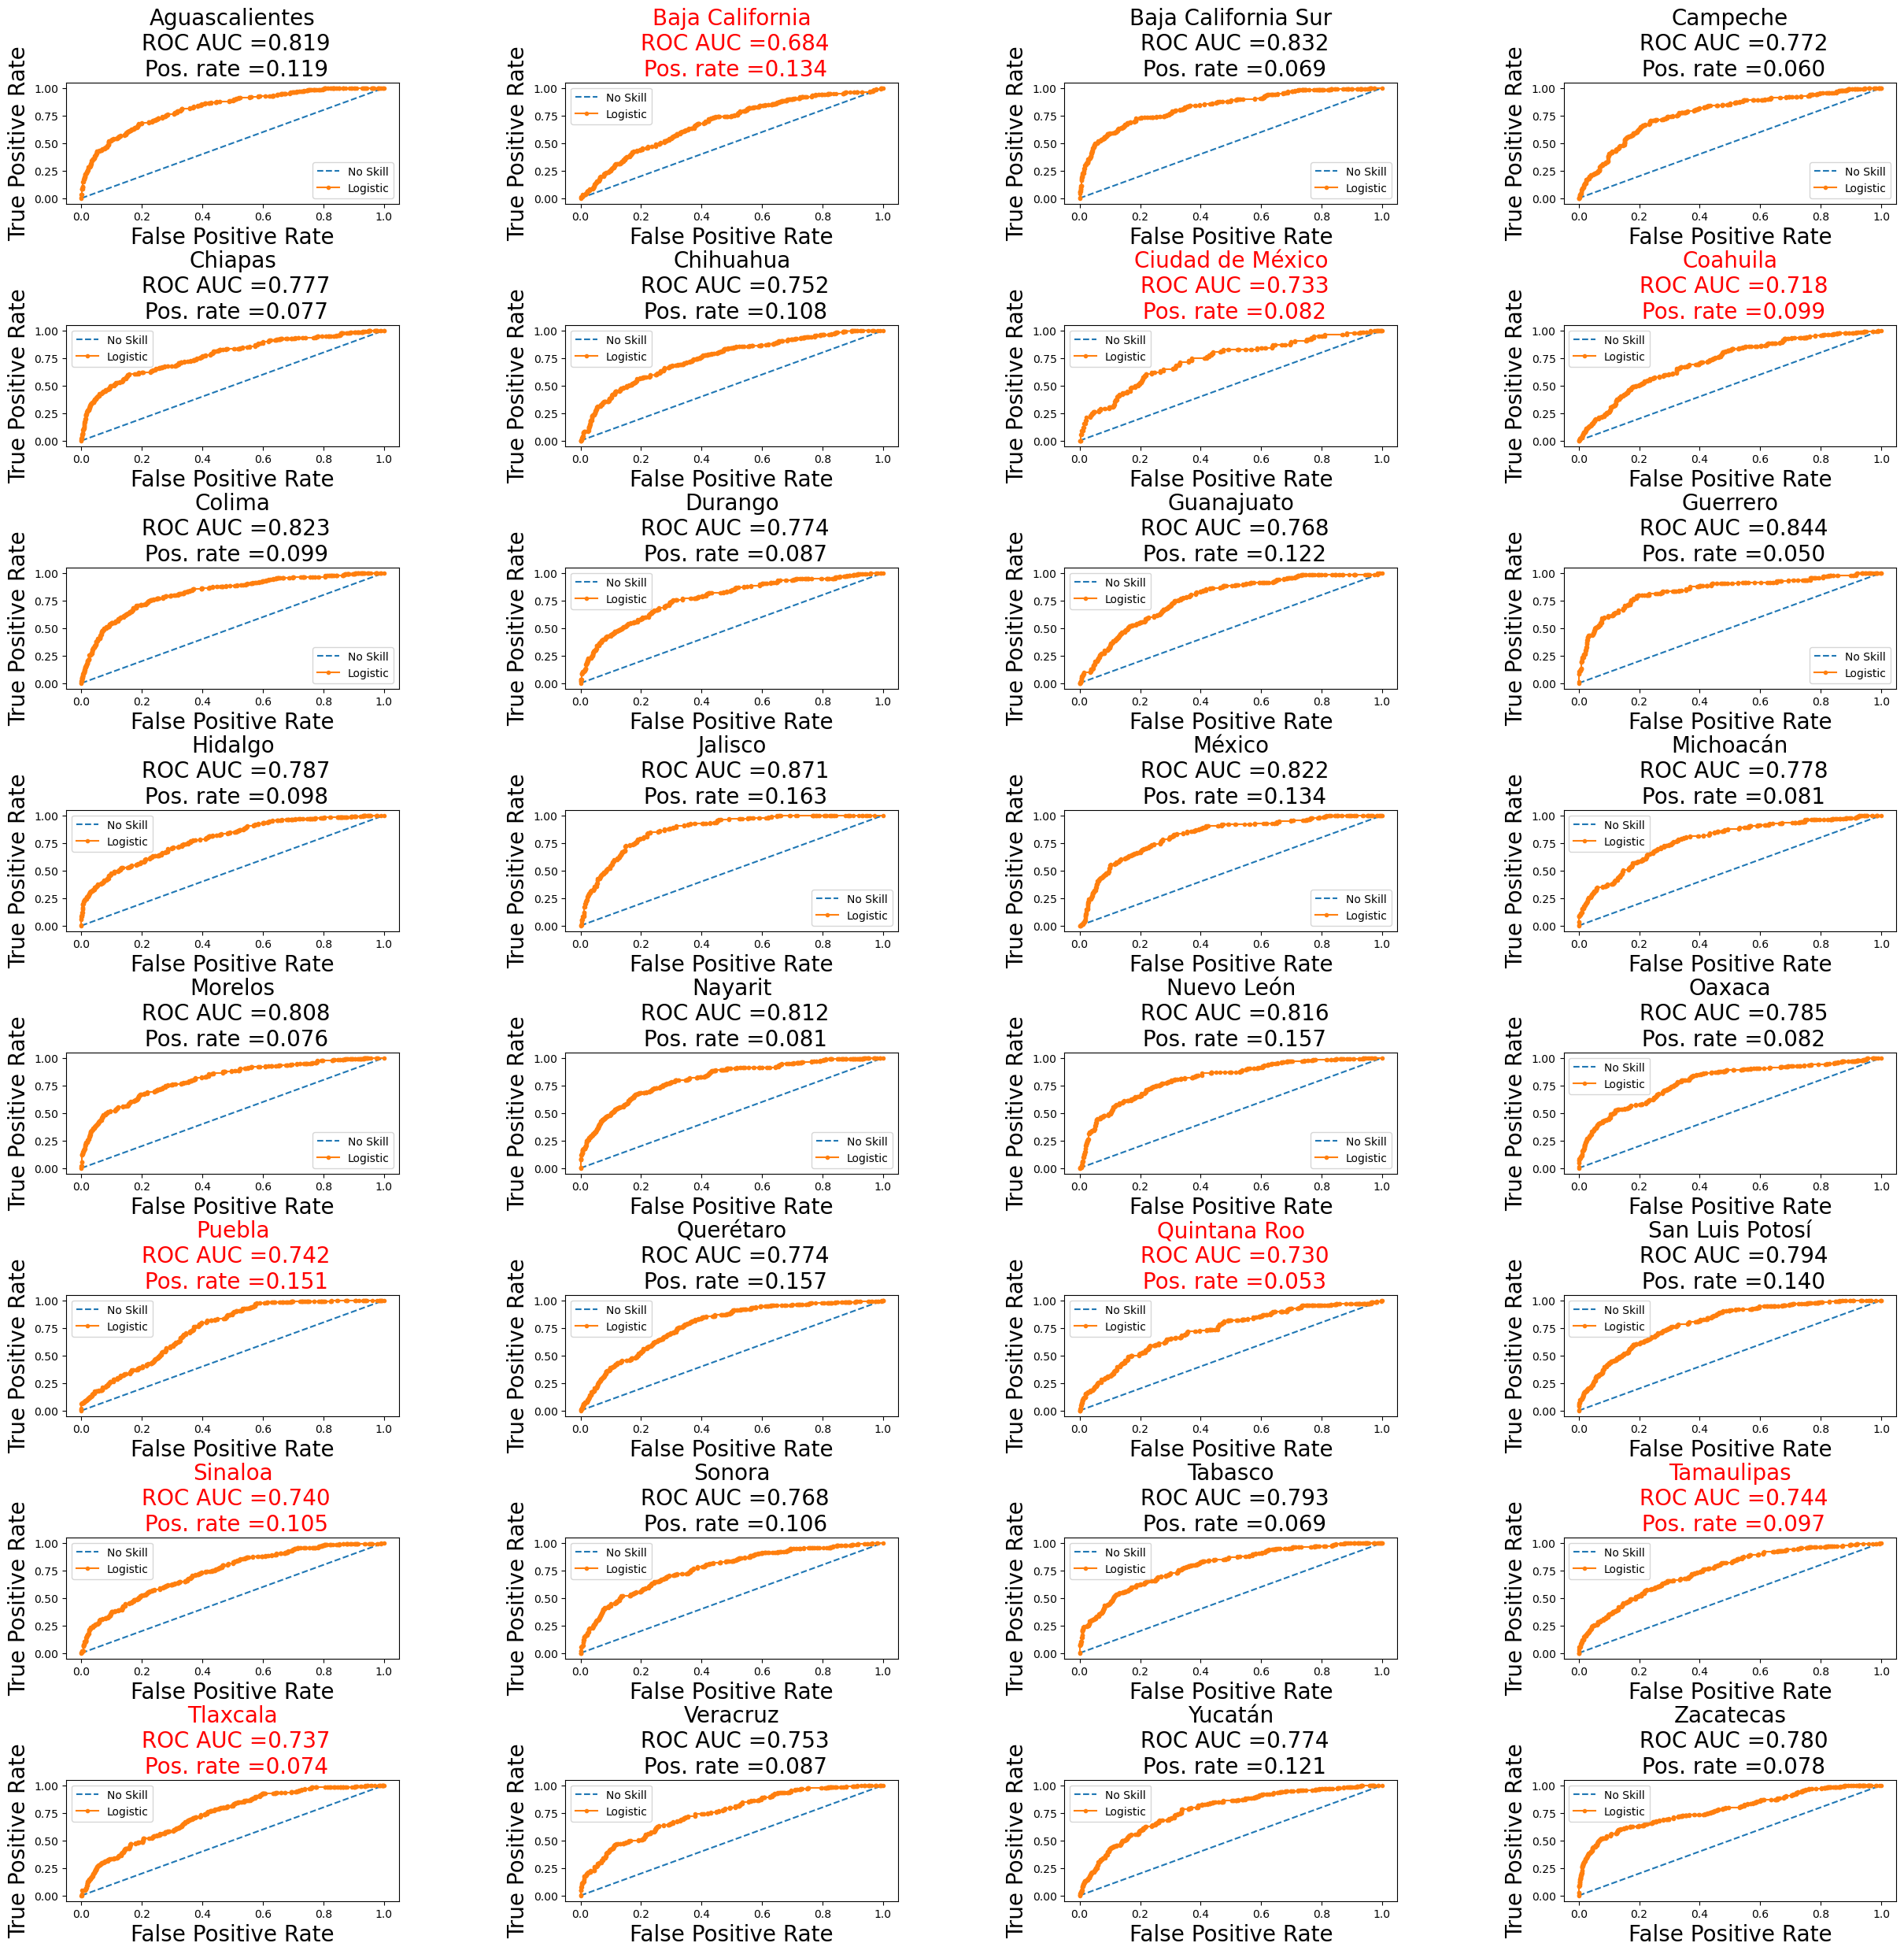

,Estado,Years,eci,eci_std_err,eci_p_value,pci,pci_std_err,pci_p_value,density,density_std_err,...,closeness_centrality_p_value,eigenvecor_centrality,eigenvecor_centrality_std_err,eigenvecor_centrality_p_value,eigenvecor_centrality_rca1,eigenvecor_centrality_rca1_std_err,eigenvecor_centrality_rca1_p_value,Intercept,Intercept_std_err,Intercept_p_value
0,Aguascalientes,All,-0.097484,0.853544,0.909070,0.159139,0.085284,6.204194e-02,5.430981,3.453605,...,0.299773,-24.073179,78.762807,0.759878,232.707077,231.376279,0.314535,-9.061369,1.892942,1.693581e-06
1,Baja California,All,-1.193458,1.842262,0.517100,0.117501,0.036797,1.407047e-03,7.246522,2.144641,...,0.754580,10.110996,62.603234,0.871692,-346.891293,138.924839,0.012526,-4.130105,2.658496,1.202919e-01
2,Baja California Sur,All,-4.570151,2.019265,0.023619,0.310914,0.102734,2.474868e-03,21.159490,3.702534,...,0.371792,-24.359725,92.334657,0.791919,203.911708,595.596539,0.732076,-13.928637,2.338687,2.588792e-09
3,Campeche,All,-0.489534,0.723198,0.498468,0.052793,0.092425,5.678669e-01,19.028593,3.839494,...,0.300487,149.514091,95.550891,0.117639,-361.536127,351.490570,0.303677,-5.529881,2.117918,9.027823e-03
4,Chiapas,All,-1.634327,1.371856,0.233526,-0.086849,0.137877,5.287573e-01,6.310354,3.389377,...,0.715063,70.283626,82.542666,0.394501,-11.144225,262.147273,0.966091,-6.833391,2.411927,4.608934e-03
5,Chihuahua,All,0.841504,0.276512,0.002340,0.049448,0.040426,2.212674e-01,21.999799,2.558662,...,0.256513,-17.245005,62.833802,0.783736,-241.040476,159.879630,0.131647,-11.369867,1.805244,3.010373e-10
6,Ciudad de México,All,1.018337,0.633912,0.108179,0.019073,0.062699,7.609756e-01,11.478332,3.351465,...,0.005734,-281.683145,93.562076,0.002607,-423.903787,143.808852,0.003202,-16.932155,4.512381,1.751659e-04
7,Coahuila,All,1.114887,0.540506,0.039144,-0.016257,0.038159,6.700874e-01,10.619420,2.187551,...,0.179164,-69.228169,67.761565,0.306950,-162.986299,188.020778,0.386023,-9.178064,2.024101,5.777000e-06
8,Colima,All,-3.310947,1.503833,0.027688,-0.122150,0.094655,1.968889e-01,4.406233,2.433773,...,0.006070,-138.612960,67.246773,0.039278,-400.634965,380.886237,0.292869,-12.696666,2.055251,6.505343e-10
9,Durango,All,-3.115703,1.512561,0.039409,0.174220,0.079479,2.837829e-02,12.727463,2.768800,...,0.399423,-36.575418,71.562200,0.609281,79.023286,298.295482,0.791074,-9.443091,1.873223,4.628816e-07


In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Estados=cdata_mex_pairs['location_code'].unique()

years_pairs=cdata_mex_pairs['year_pair'].unique()

years=['All']


#features=['Density','Discovery_Factor','RCA','GPDperCAP']

features=['eci','pci','density','rca1',
          'GPDperCAP',
          'closeness_centrality',
          'eigenvecor_centrality',
          'degree_centrality_rca1'
          
          ]

features=['eci','pci','density','rca1','discovery_factor',
          'GPDperCAP_rca1',
          'closeness_centrality',
          'eigenvecor_centrality','eigenvecor_centrality_rca1']


#features=['eci','pci','density','rca1','GPDperCAP','closeness_centrality']


#features=['Nodes_Degree_Centrality','Nodes_Eigenvector_Centrality','Nodes_Closeness_Centrality','Density','Discovery_Factor','RCA','GPDperCAP']


est_yeas=[]
for ye in years:
    for estado in Estados:
        est_yeas.append([estado,ye])
        
regression_df=pd.DataFrame(est_yeas,columns=(['Estado','Years']))

for param in features:
    regression_df[param]=0
    regression_df[param+'_std_err']=0
    regression_df[param+'_p_value']=0

# Initiate figure
fig, axs = plt.subplots(8,4, figsize=(30, 30), facecolor='w', edgecolor='k')
# fig, axs = plt.subplots(3,3, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=0.5)

axs = axs.ravel()

low_range=0.5
target='M_num_relaxed_'+str(low_range).replace('.','_')
df=cdata_mex_pairs.copy().loc[cdata_mex_pairs[target].isin([0,1])]
score=0
for i,Estado in enumerate(Estados):
    
    data_0=df.loc[(df['location_code']==Estado)][['location_code',target]+features]
    
    str_fit = target+' ~ '+features[0]
    
    for feat in features[1:]:
        str_fit=str_fit+'+'+feat
        
    x_logistic = data_0.loc[:, features].values
    
    y_logistic = data_0[target].values
    
    positive_rate=sum(y_logistic)/len(y_logistic)

    results=smf.logit(str_fit,data=data_0).fit()
    
    val_stderr=[]
    for param in results.params.keys():
        regression_df.loc[regression_df['Estado']==Estado,param]=results.params[param]
        regression_df.loc[regression_df['Estado']==Estado,param+'_std_err']=results.bse[param]
        regression_df.loc[regression_df['Estado']==Estado,param+'_p_value']=results.pvalues[param]
        
    #ROC
    
    # Genrate a Diagonal(Random Guess)
    ns_probs = [0 for _ in range(len(y_logistic))]
    # predict probabilities
    lr_probs = results.predict(data_0[features])
    # keep probabilities for the positive outcome only
    #lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_logistic, ns_probs)
    lr_auc = roc_auc_score(y_logistic, lr_probs)
    # summarize scores
   # print(Estado)
   # print('ROC AUC for Logistic Model =%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_logistic, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_logistic, lr_probs)
    # plot the roc curve for the model
    axs[i].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    axs[i].plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    axs[i].set_xlabel('False Positive Rate',size=20)
    axs[i].set_ylabel('True Positive Rate',size=20)
    
    
    # axis Title
    if lr_auc>0.75:
        tit_color='k'
        score+=1
    if lr_auc<0.75:
        tit_color='r'
        
        
    axs[i].set_title(Estado+'\n ROC AUC =%.3f' % (lr_auc)+'\n Pos. rate =%.3f' % (positive_rate),size=20,c=tit_color)
    # show the legend
    axs[i].legend()
print('Score=',score/32)
print(target)
print(features)
plt.show()   

regression_df